# Matplotlib and Seaborn Case Study

### Quantitative:

1. Kernel Density plot
2. Histogram
3. Box plot 


### Categorical: 

1. Pie chart

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)

### Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Loading the libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 1.2 import the dataset ?

In [2]:
df=pd.read_csv("../input/heart-disease/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1.3 How to see the size of your data?

In [3]:
df.size

4242

In [4]:
df.shape

(303, 14)

### 1.4 How to view the statistical characteristics of the data?

In [5]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5  a How to see just one column?

In [6]:
df["age"]

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

### 1.5 b How to check the column names? (1 mark)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 1.5 c Find the Numerical Features,Categorical Features, Alphanumeric Features?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# you also get features in describe function

df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Change the column names?

In [10]:
#Change the sex(0,1)=(female,male)
SEX={0:"female",1:"male"}
df.sex.replace(SEX,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.sex.value_counts()

male      207
female     96
Name: sex, dtype: int64

## 1.6 Quantitative:

### 1.6 a) Create kdeplot for showing age

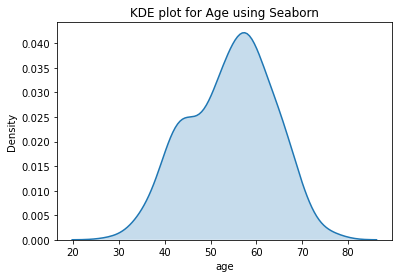

In [12]:
sns.distplot(df.age,hist=False,kde=True,kde_kws={"shade":True})
plt.title("KDE plot for Age using Seaborn")
plt.ylabel("Density")
plt.show()

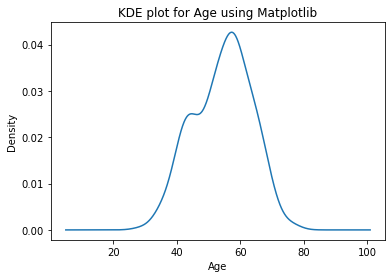

In [13]:
df.age.plot(kind="kde")
plt.title("KDE plot for Age using Matplotlib")
plt.xlabel("Age")
plt.show()

### 1.6 b) Create histogram for showing cholestrol with Number of bins 5

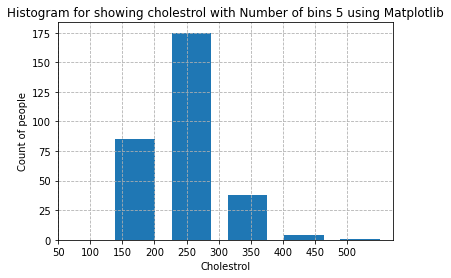

In [14]:
plt.hist(df.chol,bins=5,rwidth=0.7)
plt.grid(linestyle="--")
plt.xlabel("Cholestrol")
plt.ylabel("Count of people")
plt.xticks([50,100,150,200,250,300,350,400,450,500])
plt.title("Histogram for showing cholestrol with Number of bins 5 using Matplotlib")
plt.show()

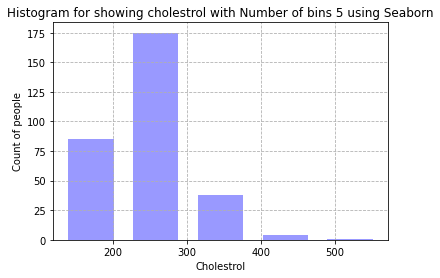

In [15]:
sns.distplot(df.chol,hist=True,kde=False,bins=5,hist_kws={"rwidth":0.7},color="blue")
plt.xlabel("Cholestrol")
plt.ylabel("Count of people")
plt.title("Histogram for showing cholestrol with Number of bins 5 using Seaborn")
plt.grid(linestyle="--")
plt.show()

### 1.6 c) Create Boxplot for showing trestbps and comment what the dark spot indicate

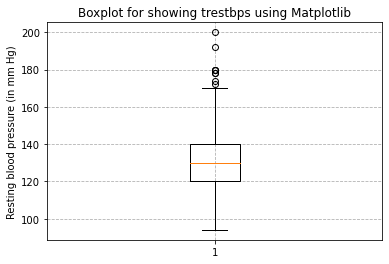

In [16]:
plt.boxplot(df.trestbps)
plt.grid(linestyle="--")
#plt.xlabel("Cholestrol")
plt.ylabel("Resting blood pressure (in mm Hg)")
plt.title("Boxplot for showing trestbps using Matplotlib")
plt.show()

In [17]:
# Dark Spots indicate the outliers

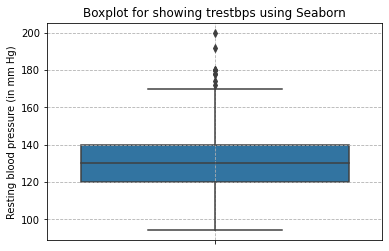

In [18]:
sns.boxplot(df.trestbps,orient="v")
plt.grid(linestyle="--")
#plt.xlabel("Cholestrol")
plt.ylabel("Resting blood pressure (in mm Hg)")
plt.title("Boxplot for showing trestbps using Seaborn")
plt.show()

##  Categorical vs. Quantitative

    * Categorical: chest_pain_type, Sex, fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
    * Numerical Features: Age (Continuous), resting_blood_pressure ,cholesterol,max_heart_rate_achieved,st_depression, num_major_vessels,target

### 1.8a) Create bar plot for showing Gender and target. And your Observation:

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


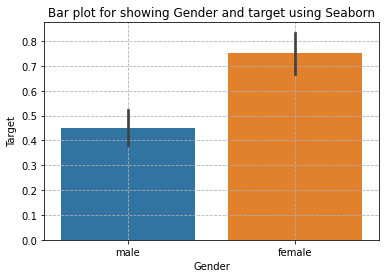

Percentages of females vs. males Heart Disease is:
 Female: 75.0 
Male: 44.927536231884055


In [20]:

#draw a bar plot of target by sex
sns.barplot(df.sex,df.target)
plt.grid(linestyle="--")
plt.xlabel("Gender")
plt.ylabel("Target")
plt.title("Bar plot for showing Gender and target using Seaborn")
plt.show()

#print percentages of females vs. males Heart Disease
male_with_heart_disease=df[(df.sex=="male") & (df.target==1)].sex.count()
female_with_heart_disease=df[(df.sex=="female") & (df.target==1)].sex.count()
total_male_count=df[(df.sex=="male")].sex.count()
total_female_count=df[(df.sex=="female")].sex.count()

male_with_heart_disease_percentage=male_with_heart_disease/total_male_count*100
female_with_heart_disease_percentage=female_with_heart_disease/total_female_count*100

print("Percentages of females vs. males Heart Disease is:\n","Female:",female_with_heart_disease_percentage,"\n"
     "Male:",male_with_heart_disease_percentage)

### Observation:



### 1.8b) Create Bar plot for checking the both target vs Sex.

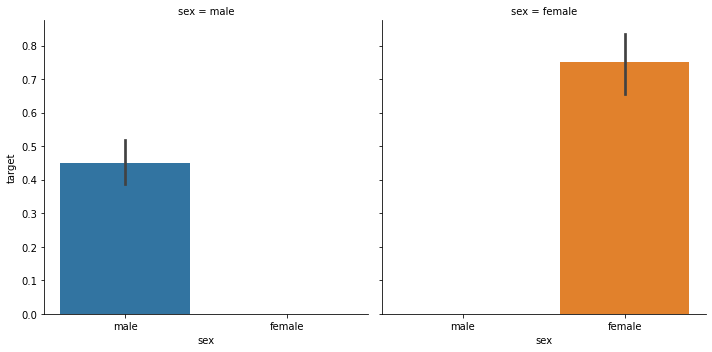

In [21]:
#create a subplot
sns.catplot(x="sex",y="target",data=df,kind="bar",col="sex")
plt.show()

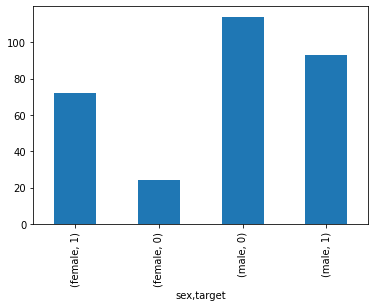

In [22]:
# create bar plot using groupby
df.groupby('sex').target.value_counts().plot.bar()
plt.show()

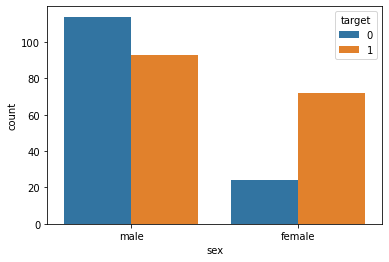

In [23]:
# create count plot

sns.countplot(x="sex",data=df,hue="target")
plt.show()

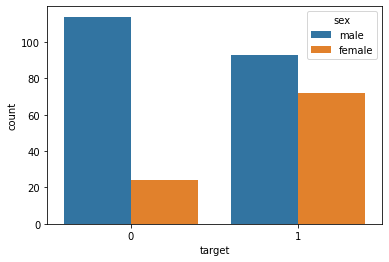

In [24]:
sns.countplot(x="target",data=df,hue="sex")
plt.show()

### 1.8d) Create Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type:Heart Disease or Not

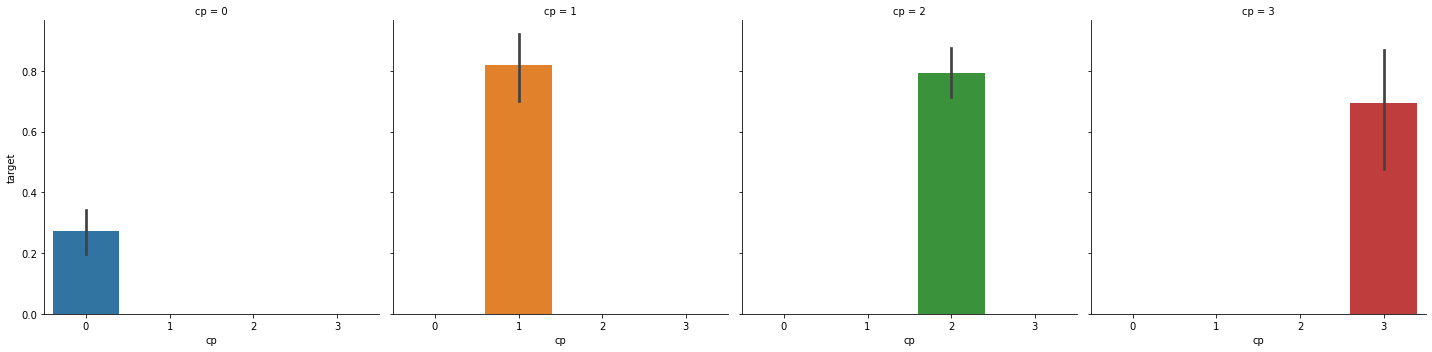

In [25]:
# create subplot plot
sns.catplot(x="cp",y="target",data=df,kind="bar",col="cp")
plt.show()

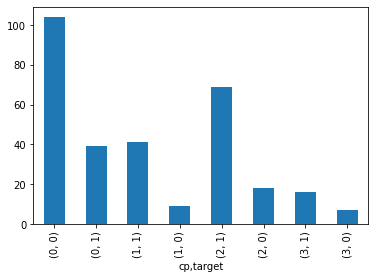

In [26]:
# create bar plot using groupby
df.groupby('cp').target.value_counts().plot.bar()
plt.show()

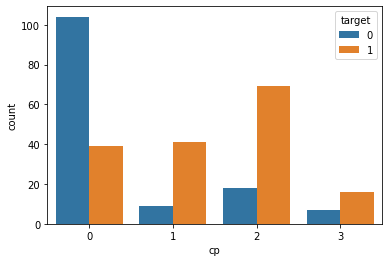

In [27]:
# create count plot
sns.countplot(x="cp",data=df,hue="target")
plt.show()

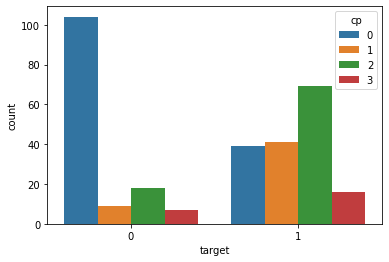

In [28]:
sns.countplot(x="target",data=df,hue="cp")
plt.show()

### 1.8c) Create violinplot plot for checking the fasting_blood_sugar and Age vs target'

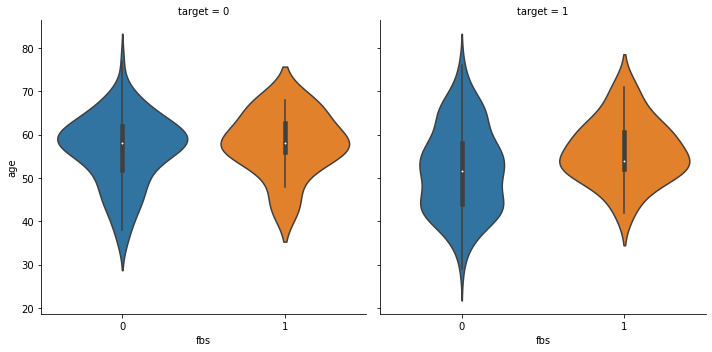

In [29]:
# create subplot plot
sns.catplot(x="fbs",y="age",data=df,kind="violin",col="target")
plt.show()

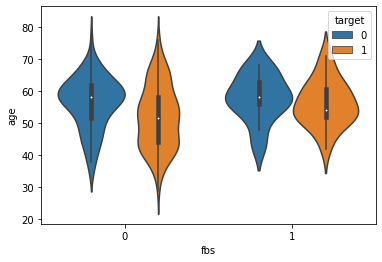

In [30]:
# create violinplot plot using groupby

sns.violinplot(x="fbs",y="age",data=df,hue="target")
plt.show()

## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### 1.8 d)create a box plot for Sex & Age 

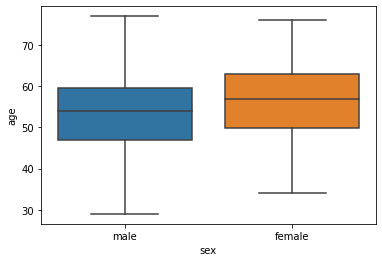

In [31]:
# create boxplot
sns.boxplot(x="sex",y="age",data=df)
plt.show()

# 1.9 Categorical vs. Categorical

* Categorical: target, Sex.

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### 1.9a) Create a Stacked bar chart for showing target & Sex

In [32]:
#create crosstab
a=pd.crosstab(df.target,df.sex)
a


sex,female,male
target,,
0,24,114
1,72,93


# 1.10 Quantitative vs. Quantitative

### 1.10a) Create a scatter plot for showing age & st_depression

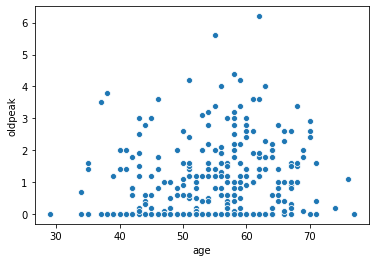

In [33]:
sns.scatterplot(x="age",y="oldpeak",data=df)
plt.show()

# Overall  Observation:
   

# THE END